# Определение расположения платформы, добывающей полезные ископаемые

У нас в наличии набор данных об расположении (у берега или в открытом море) добывающих платформ и их характеристиках.

Загружаем все необходимые библиотеки для работы с данными.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

И, конечно, наш датасет.

In [2]:
df = pd.read_csv('train.csv')

# Предообработка данных

### Разведочный анализ

Взглянем на наши данные, чтобы представлять из каких переменных они состоят

In [3]:
df.head()

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,STRIKE-SLIP/TRANSPRESSION/BASEMENT-I,OFFSHORE,OIL,DEVELOPING,INVERSION/WRENCH,3520,NEOGENE,SANDSTONE,2460.0,220.0,20.0,45.0
1,GRAVITY/EXTENSION/EVAPORITE,OFFSHORE,OIL,MATURE PRODUCTION,SALT/PASSIVE MARGIN,9967,CRETACEOUS,LIMESTONE,427.0,160.0,19.0,175.0
2,GRAVITY/EXTENSION/EVAPORITE,ONSHORE,OIL,MATURE PRODUCTION,PASSIVE MARGIN,8700,CRETACEOUS,LIMESTONE,95.0,15.0,12.0,20.0
3,COMPRESSION,ONSHORE,OIL,DECLINING PRODUCTION,THRUST,5084,CRETACEOUS,SANDSTONE,328.0,300.0,13.0,600.0
4,INVERSION/COMPRESSION/EXTENSION,ONSHORE,OIL,DECLINING PRODUCTION,INVERSION/RIFT,1030,CRETACEOUS,SANDSTONE,260.0,33.0,24.0,182.0


Наш датасет состоит из 12-ти переменных, одна из которых является целевой (Onshore/Offshore)

Размер датасета - 309 строк

In [4]:
df.shape

(309, 12)

Запросим информацию о датасете

И увидим, что он состоит из 5-ти количественных переменных и 7-ми категориальных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tectonic regime     309 non-null    object 
 1   Onshore/Offshore    309 non-null    object 
 2   Hydrocarbon type    309 non-null    object 
 3   Reservoir status    309 non-null    object 
 4   Structural setting  309 non-null    object 
 5   Depth               309 non-null    int64  
 6   Period              309 non-null    object 
 7   Lithology           309 non-null    object 
 8   Gross               309 non-null    float64
 9   Netpay              309 non-null    float64
 10  Porosity            309 non-null    float64
 11  Permeability        309 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 29.1+ KB


Проверяем набор данных на наличие пропущенных значений.

In [6]:
df.isna().sum()

Tectonic regime       0
Onshore/Offshore      0
Hydrocarbon type      0
Reservoir status      0
Structural setting    0
Depth                 0
Period                0
Lithology             0
Gross                 0
Netpay                0
Porosity              0
Permeability          0
dtype: int64

Можем увидеть, что они отсутствуют. Это ускорит предобработку наших данных

Чтобы не писать много строк кода, воспользуемся удобной функцией pandas_profiling, которая предоставит подробный первичный анализ наших данных

In [8]:
pandas_profiling.ProfileReport(df)

### Перекодировка редких переменных

При более подробном анализе наших данных мы обнаружили, что категориальные переменные содержат множество уникальных значений.

В такой ситуации, когда мы будет кодировать переменные (например, OneHotEncoder) у нас получится большое количество признаков, что усложняет модель и может негативно сказаться на качестве нашей модели.

Поэтому в каждой переменной создадим отдельный класс для редких значений.

In [7]:
rare_title_1 = df['Tectonic regime'].value_counts()[df['Tectonic regime'].value_counts() < 20].index
df['Tectonic regime'] = df['Tectonic regime'].replace(rare_title_1, 'Rare regime')

In [8]:
df['Tectonic regime'].value_counts()

Rare regime                        144
COMPRESSION                         58
EXTENSION                           32
COMPRESSION/EROSION                 27
INVERSION/COMPRESSION/EXTENSION     25
COMPRESSION/EVAPORITE               23
Name: Tectonic regime, dtype: int64

In [9]:
rare_title_2 = df['Reservoir status'].value_counts()[df['Reservoir status'].value_counts() < 20].index
df['Reservoir status'] = df['Reservoir status'].replace(rare_title_2, 'Rare status')

In [10]:
df['Reservoir status'].value_counts()

DECLINING PRODUCTION    93
MATURE PRODUCTION       55
NEARLY DEPLETED         52
Rare status             35
PLATEAU PRODUCTION      32
DEVELOPING              21
REJUVENATING            21
Name: Reservoir status, dtype: int64

In [11]:
rare_title_3 = df['Structural setting'].value_counts()[df['Structural setting'].value_counts() < 20].index
df['Structural setting'] = df['Structural setting'].replace(rare_title_3, 'Rare setting')

In [12]:
df['Structural setting'].value_counts()

Rare setting     162
FORELAND          71
RIFT              48
INTRACRATONIC     28
Name: Structural setting, dtype: int64

In [13]:
rare_title_4 = df['Period'].value_counts()[df['Period'].value_counts() < 20].index
df['Period'] = df['Period'].replace(rare_title_4, 'Rare Period')

In [14]:
df['Period'].value_counts()

CRETACEOUS       83
Rare Period      59
NEOGENE          45
JURASSIC         41
PALEOGENE        34
CARBONIFEROUS    25
PERMIAN          22
Name: Period, dtype: int64

In [15]:
rare_title_5 = df['Lithology'].value_counts()[df['Lithology'].value_counts() < 20].index
df['Lithology'] = df['Lithology'].replace(rare_title_5, 'Rare litho')

In [16]:
df['Lithology'].value_counts()

SANDSTONE     180
Rare litho     49
LIMESTONE      42
DOLOMITE       38
Name: Lithology, dtype: int64

Закодируем нашу целевую переменную.

In [17]:
df['Onshore/Offshore'][df['Onshore/Offshore'] == "OFFSHORE"] = 0
df['Onshore/Offshore'][df['Onshore/Offshore'] == "ONSHORE"] = 1
df['Onshore/Offshore'][df['Onshore/Offshore'] == "ONSHORE-OFFSHORE"] = 2
df['Onshore/Offshore'] = df['Onshore/Offshore'].astype(int)

In [18]:
# проверяем, что наша переменная перекодировалась
df

,Tectonic regime,Onshore/Offshore,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,Rare regime,0,OIL,DEVELOPING,Rare setting,3520,NEOGENE,SANDSTONE,2460.0,220.0,20.0,45.0
1,Rare regime,0,OIL,MATURE PRODUCTION,Rare setting,9967,CRETACEOUS,LIMESTONE,427.0,160.0,19.0,175.0
2,Rare regime,1,OIL,MATURE PRODUCTION,Rare setting,8700,CRETACEOUS,LIMESTONE,95.0,15.0,12.0,20.0
3,COMPRESSION,1,OIL,DECLINING PRODUCTION,Rare setting,5084,CRETACEOUS,SANDSTONE,328.0,300.0,13.0,600.0
4,INVERSION/COMPRESSION/EXTENSION,1,OIL,DECLINING PRODUCTION,Rare setting,1030,CRETACEOUS,SANDSTONE,260.0,33.0,24.0,182.0
...,...,...,...,...,...,...,...,...,...,...,...,...
304,Rare regime,0,OIL,DECLINING PRODUCTION,Rare setting,13265,NEOGENE,Rare litho,1500.0,295.0,29.0,1500.0
305,INVERSION/COMPRESSION/EXTENSION,0,OIL,DECLINING PRODUCTION,Rare setting,1657,CRETACEOUS,Rare litho,164.0,98.0,32.0,7500.0
306,COMPRESSION/EVAPORITE,1,OIL,Rare status,FORELAND,10211,CRETACEOUS,Rare litho,328.0,213.0,13.0,0.8
307,Rare regime,0,GAS-CONDENSATE,PLATEAU PRODUCTION,Rare setting,16360,JURASSIC,SANDSTONE,980.0,490.0,16.0,10.0


In [19]:
# Разделим признаки и целевую переменную, это необходимо для удобства использования методов анализа данных.
X = df.drop(["Onshore/Offshore"], axis = 1)
y = df['Onshore/Offshore']

In [20]:
X.shape

(309, 11)

In [21]:
X

,Tectonic regime,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Gross,Netpay,Porosity,Permeability
0,Rare regime,OIL,DEVELOPING,Rare setting,3520,NEOGENE,SANDSTONE,2460.0,220.0,20.0,45.0
1,Rare regime,OIL,MATURE PRODUCTION,Rare setting,9967,CRETACEOUS,LIMESTONE,427.0,160.0,19.0,175.0
2,Rare regime,OIL,MATURE PRODUCTION,Rare setting,8700,CRETACEOUS,LIMESTONE,95.0,15.0,12.0,20.0
3,COMPRESSION,OIL,DECLINING PRODUCTION,Rare setting,5084,CRETACEOUS,SANDSTONE,328.0,300.0,13.0,600.0
4,INVERSION/COMPRESSION/EXTENSION,OIL,DECLINING PRODUCTION,Rare setting,1030,CRETACEOUS,SANDSTONE,260.0,33.0,24.0,182.0
...,...,...,...,...,...,...,...,...,...,...,...
304,Rare regime,OIL,DECLINING PRODUCTION,Rare setting,13265,NEOGENE,Rare litho,1500.0,295.0,29.0,1500.0
305,INVERSION/COMPRESSION/EXTENSION,OIL,DECLINING PRODUCTION,Rare setting,1657,CRETACEOUS,Rare litho,164.0,98.0,32.0,7500.0
306,COMPRESSION/EVAPORITE,OIL,Rare status,FORELAND,10211,CRETACEOUS,Rare litho,328.0,213.0,13.0,0.8
307,Rare regime,GAS-CONDENSATE,PLATEAU PRODUCTION,Rare setting,16360,JURASSIC,SANDSTONE,980.0,490.0,16.0,10.0


Коррелированные признаки будут мешать нашей модели показывать приемлемое качество.

Поэтому строим коррелиционную матрицу и ищем переменные, которые мы исключим из нашей модели.

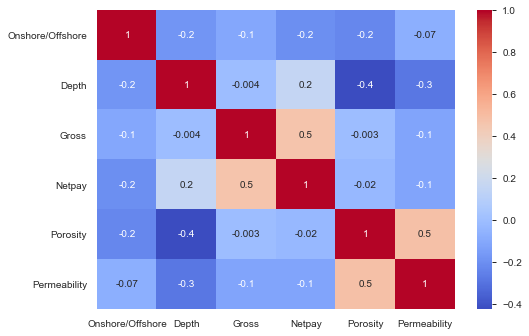

In [22]:
sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'coolwarm')

В каждой паре коррелированных переменных удаляем по одному, в нашем случае это "Gross" и 'Porosity'

In [23]:
X.drop(["Gross", 'Porosity'], axis = 1) 

,Tectonic regime,Hydrocarbon type,Reservoir status,Structural setting,Depth,Period,Lithology,Netpay,Permeability
0,Rare regime,OIL,DEVELOPING,Rare setting,3520,NEOGENE,SANDSTONE,220.0,45.0
1,Rare regime,OIL,MATURE PRODUCTION,Rare setting,9967,CRETACEOUS,LIMESTONE,160.0,175.0
2,Rare regime,OIL,MATURE PRODUCTION,Rare setting,8700,CRETACEOUS,LIMESTONE,15.0,20.0
3,COMPRESSION,OIL,DECLINING PRODUCTION,Rare setting,5084,CRETACEOUS,SANDSTONE,300.0,600.0
4,INVERSION/COMPRESSION/EXTENSION,OIL,DECLINING PRODUCTION,Rare setting,1030,CRETACEOUS,SANDSTONE,33.0,182.0
...,...,...,...,...,...,...,...,...,...
304,Rare regime,OIL,DECLINING PRODUCTION,Rare setting,13265,NEOGENE,Rare litho,295.0,1500.0
305,INVERSION/COMPRESSION/EXTENSION,OIL,DECLINING PRODUCTION,Rare setting,1657,CRETACEOUS,Rare litho,98.0,7500.0
306,COMPRESSION/EVAPORITE,OIL,Rare status,FORELAND,10211,CRETACEOUS,Rare litho,213.0,0.8
307,Rare regime,GAS-CONDENSATE,PLATEAU PRODUCTION,Rare setting,16360,JURASSIC,SANDSTONE,490.0,10.0


### Кодирование переменных

Так как алгоритмы машинного обучения работают с числами, то нам прийдётся перекодировать категориальные признаки в числа.

In [24]:
# воспользуемся OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [25]:
X.dtypes

Tectonic regime        object
Hydrocarbon type       object
Reservoir status       object
Structural setting     object
Depth                   int64
Period                 object
Lithology              object
Gross                 float64
Netpay                float64
Porosity              float64
Permeability          float64
dtype: object

In [26]:
enc = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

In [27]:
# исключаем из DataFrame количественные переменные
quantitative_label = list(X.select_dtypes(include = 'int64').columns) + list(X.select_dtypes(include = 'float64').columns)

In [28]:
X[quantitative_label].head()

,Depth,Gross,Netpay,Porosity,Permeability
0,3520,2460.0,220.0,20.0,45.0
1,9967,427.0,160.0,19.0,175.0
2,8700,95.0,15.0,12.0,20.0
3,5084,328.0,300.0,13.0,600.0
4,1030,260.0,33.0,24.0,182.0


In [29]:
# создаём DataFrame с категориальными переменными
X_enc = X.drop(quantitative_label, axis = 1)

In [30]:
X_enc.head()

,Tectonic regime,Hydrocarbon type,Reservoir status,Structural setting,Period,Lithology
0,Rare regime,OIL,DEVELOPING,Rare setting,NEOGENE,SANDSTONE
1,Rare regime,OIL,MATURE PRODUCTION,Rare setting,CRETACEOUS,LIMESTONE
2,Rare regime,OIL,MATURE PRODUCTION,Rare setting,CRETACEOUS,LIMESTONE
3,COMPRESSION,OIL,DECLINING PRODUCTION,Rare setting,CRETACEOUS,SANDSTONE
4,INVERSION/COMPRESSION/EXTENSION,OIL,DECLINING PRODUCTION,Rare setting,CRETACEOUS,SANDSTONE


In [31]:
# кодируем
X_enc = enc.fit_transform(X_enc)
X_enc = pd.DataFrame(X_enc, columns = enc.get_feature_names())

In [32]:
# проверяем
X_enc.tail()

,x0_COMPRESSION,x0_COMPRESSION/EROSION,x0_COMPRESSION/EVAPORITE,x0_EXTENSION,x0_INVERSION/COMPRESSION/EXTENSION,x0_Rare regime,x1_CARBON DIOXIDE,x1_GAS,x1_GAS-CONDENSATE,x1_METHANE HYDRATE,...,x4_CRETACEOUS,x4_JURASSIC,x4_NEOGENE,x4_PALEOGENE,x4_PERMIAN,x4_Rare Period,x5_DOLOMITE,x5_LIMESTONE,x5_Rare litho,x5_SANDSTONE
304,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
305,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
306,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
307,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
308,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
# соединяем два DataFrame в единый
X = pd.concat([X[quantitative_label], X_enc], axis = 1)

In [34]:
X.head()

,Depth,Gross,Netpay,Porosity,Permeability,x0_COMPRESSION,x0_COMPRESSION/EROSION,x0_COMPRESSION/EVAPORITE,x0_EXTENSION,x0_INVERSION/COMPRESSION/EXTENSION,...,x4_CRETACEOUS,x4_JURASSIC,x4_NEOGENE,x4_PALEOGENE,x4_PERMIAN,x4_Rare Period,x5_DOLOMITE,x5_LIMESTONE,x5_Rare litho,x5_SANDSTONE
0,3520,2460.0,220.0,20.0,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9967,427.0,160.0,19.0,175.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8700,95.0,15.0,12.0,20.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5084,328.0,300.0,13.0,600.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1030,260.0,33.0,24.0,182.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
X.shape

(309, 38)

Для некоторых алгоритмов машинного обучения критично наличие нормализованных данных, поэтому проведём нормализацию

In [36]:
# нормализация данных
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

names = X.columns
d = scaler.fit_transform(X)

X = pd.DataFrame(d, columns = names)
X.head()

,Depth,Gross,Netpay,Porosity,Permeability,x0_COMPRESSION,x0_COMPRESSION/EROSION,x0_COMPRESSION/EVAPORITE,x0_EXTENSION,x0_INVERSION/COMPRESSION/EXTENSION,...,x4_CRETACEOUS,x4_JURASSIC,x4_NEOGENE,x4_PALEOGENE,x4_PERMIAN,x4_Rare Period,x5_DOLOMITE,x5_LIMESTONE,x5_Rare litho,x5_SANDSTONE
0,0.185081,0.233483,0.073925,0.348231,0.005999,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.546663,0.039661,0.053763,0.329609,0.023332,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.475603,0.008008,0.005040,0.199255,0.002665,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.272799,0.030222,0.100806,0.217877,0.079999,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.045429,0.023739,0.011089,0.422719,0.024265,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
X.drop([49,110,194,195,228], axis = 0, inplace = True)
y.drop([49,110,194,195,228], axis = 0, inplace = True)

# Обучение модели

Разделим наши данные на обучаещую и тестовую выборки. 

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, stratify = y)

In [40]:
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

Импортируем все необходимые алгоритмы машинного обучения.

In [41]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

In [42]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

### KNN (метод к-ближайших соседей)

In [86]:
# создаем переменную для KNN
knn = KNeighborsClassifier(n_neighbors=3)

In [88]:
# обучаем модель и выводим результаты на обучаюшем и тестовом наборе
knn.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(knn.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(X_test, y_test)))

f1_score_knn = knn.score(X_test, y_test)

Правильность на обучающем наборе: 0.883
Правильность на тестовом наборе: 0.81


С помощью следующей функции мы можем настроить гиперпараметр (количество соседей).

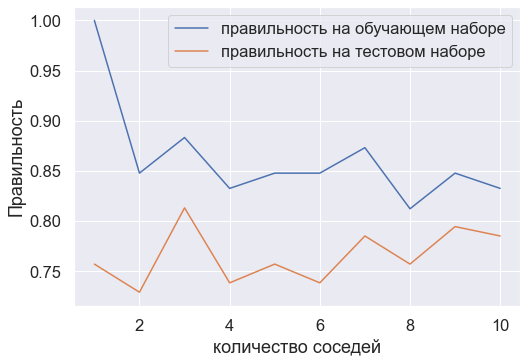

In [89]:
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # строим модель
 knn = KNeighborsClassifier(n_neighbors=n_neighbors)
 knn.fit(X_train, y_train)
 # записываем правильность на обучающем наборе
 training_accuracy.append(knn.score(X_train, y_train))
 # записываем правильность на тестовом наборе
 test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()

По графику можем увидеть, что 3 соседа дают наибольшую правильность на тестовом наборе.

### SVC (метод опорных векторов)

In [73]:
svc = SVC(C=1000)
svc.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(svc.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(svc.score(X_test, y_test)))
f1_score_svc = svc.score(X_test, y_test)

Правильность на обучающем наборе: 0.99
Правильность на тестовом наборе: 0.79


### Деревья решений

In [71]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

f1_score_tree = tree.score(X_test, y_test)

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.720


### Случайный лес

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
r_forest = RandomForestClassifier(n_estimators=120, random_state=0)
r_forest.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(r_forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(r_forest.score(X_test, y_test)))

f1_score_r_forest = r_forest.score(X_test, y_test)

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.822


Можем заметить, что случайный лес значительно лучше предсказывает значения на тестовом наборе в сравнении с деревьями принятия решений.

### Градиентный бустинг

In [76]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

f1_score_gbrt = gbrt.score(X_test, y_test)

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.804


In [59]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=3)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.804


In [60]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.873
Правильность на тестовом наборе: 0.776


### Нейронная сеть

In [62]:
from sklearn.neural_network import MLPClassifier

In [74]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train)))
print("Правильности на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test)))

f1_score_mlp = mlp.score(X_test, y_test)

Правильность на обучающем наборе: 0.92
Правильности на тестовом наборе: 0.86


In [64]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(mlp.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test, y_test)))

Правильность на обучающем наборе: 0.944
Правильность на тестовом наборе: 0.841


### CatBoost

In [78]:
from catboost import Pool, CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(cat.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(cat.score(X_test, y_test)))

f1_score_cat = cat.score(X_test, y_test)

Learning rate set to 0.005148
0:	learn: 0.6912073	total: 1.61ms	remaining: 1.61s
1:	learn: 0.6877548	total: 3.21ms	remaining: 1.6s
2:	learn: 0.6848162	total: 4.7ms	remaining: 1.56s
3:	learn: 0.6815031	total: 6.11ms	remaining: 1.52s
4:	learn: 0.6785406	total: 7.55ms	remaining: 1.5s
5:	learn: 0.6751178	total: 9.15ms	remaining: 1.52s
6:	learn: 0.6718364	total: 10.1ms	remaining: 1.44s
7:	learn: 0.6686987	total: 11.1ms	remaining: 1.38s
8:	learn: 0.6653670	total: 12.1ms	remaining: 1.33s
9:	learn: 0.6628109	total: 13ms	remaining: 1.29s
10:	learn: 0.6597203	total: 14.1ms	remaining: 1.27s
11:	learn: 0.6569753	total: 15ms	remaining: 1.23s
12:	learn: 0.6549752	total: 15.9ms	remaining: 1.21s
13:	learn: 0.6511902	total: 16.9ms	remaining: 1.19s
14:	learn: 0.6476710	total: 17.9ms	remaining: 1.17s
15:	learn: 0.6445176	total: 18.8ms	remaining: 1.16s
16:	learn: 0.6416780	total: 19.8ms	remaining: 1.15s
17:	learn: 0.6392768	total: 20.7ms	remaining: 1.13s
18:	learn: 0.6365067	total: 21.7ms	remaining: 1.12s

# Сравниваем модели

Теперь сравним правильность наших моделей.

In [91]:
f1_score_list = [f1_score_knn, f1_score_tree, f1_score_r_forest, f1_score_gbrt, f1_score_svc, f1_score_mlp, f1_score_cat]
name_f1_score_list = ['knn', 'tree', 'r_forest', 'gbrt', 'svc', 'mlp', 'cat']

In [92]:
f1_score_list

[0.8130841121495327,
 0.719626168224299,
 0.822429906542056,
 0.8037383177570093,
 0.794392523364486,
 0.8598130841121495,
 0.822429906542056]

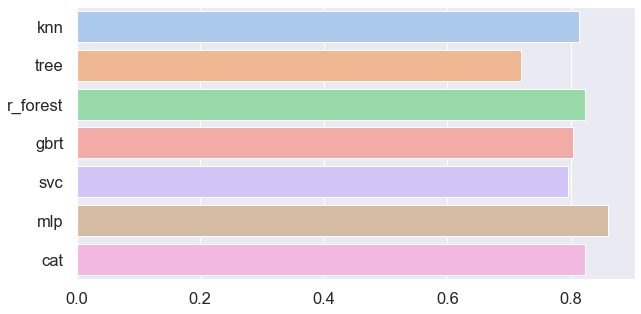

In [93]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y = name_f1_score_list, x = f1_score_list, palette = 'pastel', orient = 'h');

В итоге лучшую модель по правильности построила нейронная сеть, также неплохо себя показали CatBoost и случайный лес.

Построим матрицу ошибок для модели, построенной нейронной сетью.

In [94]:
preds = mlp.predict(X_test)
confusion_matrix(y_test, preds)

array([[25,  8],
       [ 7, 67]], dtype=int64)

В итоге наша модель совершила 8 ошибок первого рода и 7 ошибок второго рода.

In [95]:
from sklearn import metrics
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.89      0.91      0.90        74

    accuracy                           0.86       107
   macro avg       0.84      0.83      0.83       107
weighted avg       0.86      0.86      0.86       107



Правильность принятия решений нашей моделью равна 0.86, что является неплохим результатом.